# Accessing database with SQL magic, and converting SQL table to a dataframe 

In [1]:
import ibm_db
import ibm_db_sa

In [2]:
import sqlalchemy

In [3]:
%load_ext sql

In [4]:
# Enter your Db2 credentials in the connection string below
# Recall you created Service Credentials in Part III of the first lab of the course in Week 1
# i.e. from the uri field in the Service Credentials copy everything after db2:// (but remove the double quote at the end)
# for example, if your credentials are as in the screenshot above, you would write:
# %sql ibm_db_sa://my-username:my-password@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
# Note the ibm_db_sa:// prefix instead of db2://
# This is because JupyterLab's ipython-sql extension uses sqlalchemy (a python SQL toolkit)
# which in turn uses IBM's sqlalchemy dialect: ibm_db_sa
%sql ibm_db_sa://pnp67536:------------@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB

In [5]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)


 * ibm_db_sa://pnp67536:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.
99 rows affected.


[]

#### Using Python Variables in SQL Statements

In [9]:
country = 'Canada'

%sql SELECT * FROM INTERNATIONAL_STUDENT_TEST_SCORES WHERE country = :country

 * ibm_db_sa://pnp67536:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


In [17]:
%sql SELECT * FROM INTERNATIONAL_STUDENT_TEST_SCORES

 * ibm_db_sa://pnp67536:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


##### We can use the normal python assignment syntax to assign the results of our queries to python variables.

In [30]:
individual_score_distribution = %sql SELECT test_score as score, count(*) as frequency from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score

 * ibm_db_sa://pnp67536:***@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB
Done.


#### Converting Query Results to DataFrames

In [33]:
dataframe = individual_score_distribution.DataFrame()
dataframe

,score,frequency
0,38,2
1,40,1
2,43,2
3,44,2
4,45,8
5,46,7
6,47,4
7,48,14
8,49,8
9,50,10


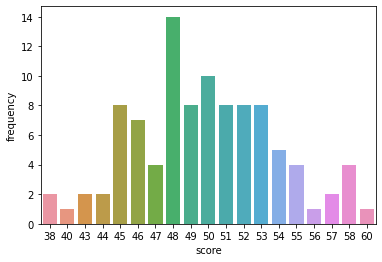

In [35]:
%matplotlib inline
import seaborn
plot = seaborn.barplot(x='score',y='frequency', data=dataframe)